# Python for Machine learning

The basic idea of any machine learning model is to have a large number of inputs and the outputs. After analyzing more and more data, it tries to figure out the relationship between input and output.

Consider a very simple example when you have to decide whether to wear a jacket or not based on the outside temperature. You have the data below and we call it training data. 


| Outside Temperature | Wear a Jacket |
|---------------------|---------------|
| 90°F                | No            |
| 80°F                | No            |
| 70°F                | No            |
| 60°F                | Yes           |
| 20°F                | Yes           |

Somehow, we find out a connection between the input (temperature) and the output (decision to wear a jacket).
If the temperature is 65°F, you would still wear a jacket although you were never told the outcome for that particular temperature.

Now, let's move on to a simple regression problem which the computer will solve for us.
Before we begin, we need to import the scikit-learn package, it provides easy to use functions and a lot of machine learning models. We will use it for today's workshop. 

```python
# install scikit package using conda
conda install -c conda-forge scikit-image
# using pip
pip install -U scikit-learn
# install yellowbrick package using conda
conda install -c districtdatalabs yellowbrick
# using pip
pip install yellowbrick
```

In [2]:
import sklearn
import yellowbrick
print("sklearn version is:" + sklearn.__version__)
print("yellowbrick version is:" + yellowbrick.__version__)

sklearn version is:0.21.3
yellowbrick version is:1.0.1


Sample Training Set
Here, X is the input and y is the output.

| x1 | x2 | y  |
|----|----|----|
| 1  | 2  | 5  |
| 4  | 5  | 14 |
| 11 | 12 | 35 |
| 21 | 22 | 65 |
| 5  | 5  | 15 |

Given the training set you could easily guess that the output (y) is (x1 + 2````*````x2 ).

## How to Generate a Data Set

In [3]:
# import randint function from random package
from random import randint

# Create two empty list to storage training input and output data 
TrainInput = list()
TrainOutput = list()

# Generate 100 random set of x1 and x2
for i in range(100):
    x1 = randint(0, 1000) # generate random integers between 0 and 1000. 
    x2 = randint(0, 1000)
    y = x1 + (2*x2)
    #append method is to add x1 and x2 to the Train list.
    TrainInput.append([x1, x2]) 
    TrainOutput.append(y)

In [4]:
TrainInput[0:6]

[[607, 224], [695, 968], [194, 340], [840, 461], [451, 328], [575, 958]]

In [5]:
TrainOutput[0:6]

[1055, 2631, 874, 1762, 1107, 2491]

## The Machine Learning Model: Linear Regression
Working with linear regression model is simple. Create a model, train it and then test it.

### Train the Model
We have generated the training data already, so create a linear regression model and pass it the training data. 


In [6]:
from sklearn.linear_model import LinearRegression
predictor=LinearRegression()
# fit the model using traininput and trainoutput
predictor.fit(X=TrainInput, y=TrainOutput)

# get the coefficients and print out
coefficient=predictor.coef_
print('Coefficient : {}.'.format(coefficient))

Coefficient : [1. 2.].


### Test Data

X = [[10, 20]]

The outcome should be 10+2```*```20 =50. Let us see what we get.

In [7]:
Xtest = [[10, 20]]
Outcome = predictor.predict(X=Xtest)
print('Outcome: {}'.format(Outcome))

Outcome: [50.]


## Another Linear Regression Example

Sales (in thousands of units) for a particular product as a function of advertising budgets (in thousands of dollars) for TV, radio, and newspaper media. Suppose that in our role as statistical consultants we are asked to suggest.
1. We want to find a function that given input budgets for TV, radio and newspaper predicts the output sales.
2. Which media contribute to sales?
3. Visualize the relationship between the features and response. Note: In machine learning variables are usually called features.

Reference: https://medium.com/simple-ai/linear-regression-intro-to-machine-learning-6-6e320dbdaf06

In [8]:
#import the packages
import pandas as pd
#import the adversting.csv data
data =  pd.read_csv("I:\\Classes\\OIT_Training\\Python for Machine Learning\\Advertising.csv")
# view the first five rows of the data
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
# create a Python list of feature names
feature_names = ['TV', 'radio', 'newspaper']
feature_names

['TV', 'radio', 'newspaper']

In [11]:
# use the list to select a subset of the original DataFrame
X = data[feature_names]

In [12]:
# use the list to select a subeset of the original DataFrame
y = data['sales']

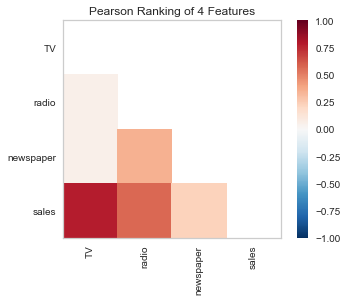

In [13]:
# visualize relationship between the variables
from yellowbrick.features import Rank2D
visualizer = Rank2D(algorithm='pearson')
visualizer.fit(data)
visualizer.transform(data)
visualizer.show()

In [14]:
# import train_test_split function
from sklearn.model_selection import train_test_split
# Split X and y into traning and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1) # random_state=int, random_state is the seed used by the random number generator

In [15]:
#import model
from sklearn.linear_model import LinearRegression
# Linear Regression Model
linreg = LinearRegression()
# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# Check the coefficient
linreg.coef_

array([0.04656457, 0.17915812, 0.00345046])

In [16]:
# plot the regression line use seaborn 
# compute the R square value
from sklearn.metrics import r2_score
print('R2 Score:', r2_score(y_test,y_pred))

R2 Score: 0.9156213613792232


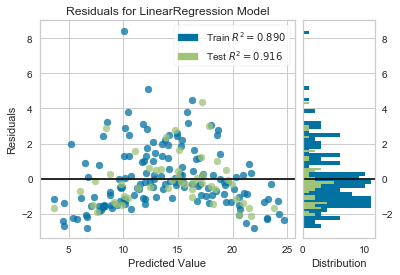

In [17]:
from yellowbrick.regressor import ResidualsPlot
# Visualzie the training and fitting model and the residual histogram
visualizer = ResidualsPlot(linreg)
visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

Exercise 1:
1. Import the packages using the python code below:
```Python
#import the packages
import pandas as pd
#import model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from yellowbrick.features import Rank2D
from yellowbrick.regressor import ResidualsPlot
```
2. Import the data named "'bikeshare.csv" as a dataframe.

```python
data =  pd.read_csv(r"I:\Classes\OIT_Training\Workshop\Python for Machine Learning\bikeshare.csv")
```
3. Create a Python list of feature names:
    1. X is "season", "month", "hour", "holiday", "weekday", "workingday",
    "weather", "temp", "feelslike", "humidity", "windspeed".
4. Use the list to select a subset, X, of the original DataFrame 

5. Use the python commands below to show the pearson correlation matrix

```python
# visualize relationship between the variables
from yellowbrick.features import Rank2D
visualizer = Rank2D(algorithm='pearson')
visualizer.fit(X, y)
visualizer.transform(X)
visualizer.show()
```

6. Use the list to select a subset, y, of the original DataFrame 
    * Y is "riders"
    
7. Split X and y into training and testing sets  
8. Create a linear regression function and fit the model from the training data, and test using the testing data.
9. Check the coefficient
10. Visualize the residuals of training and testing model 

   rowid        date  season  year  month  hour  holiday  weekday  workingday  \
0      1  2011-01-01       1     0      1     0        0        6           0   
1      2  2011-01-01       1     0      1     1        0        6           0   
2      3  2011-01-01       1     0      1     2        0        6           0   
3      4  2011-01-01       1     0      1     3        0        6           0   
4      5  2011-01-01       1     0      1     4        0        6           0   

   weather  temp  feelslike  humidity  windspeed  casual  registered  riders  
0        1  0.24     0.2879      0.81        0.0       3          13      16  
1        1  0.22     0.2727      0.80        0.0       8          32      40  
2        1  0.22     0.2727      0.80        0.0       5          27      32  
3        1  0.24     0.2879      0.75        0.0       3          10      13  
4        1  0.24     0.2879      0.75        0.0       0           1       1  


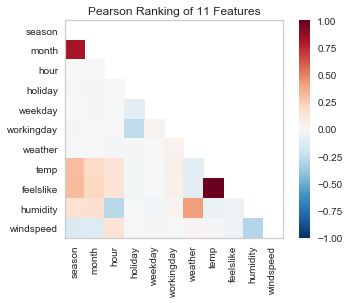

In [18]:
#import the packages
import pandas as pd
#import model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from yellowbrick.features import Rank2D
from yellowbrick.regressor import ResidualsPlot
# import data
BikeData =  pd.read_csv(r"I:\Classes\OIT_Training\Python for Machine Learning\bikeshare.csv")
print(BikeData.head())
featureNames = ["season", "month", "hour", "holiday", "weekday", "workingday", "weather", "temp", "feelslike", "humidity", "windspeed"]
X = BikeData[featureNames]
y = BikeData['riders']

# visualize relationship between the variables
from yellowbrick.features import Rank2D
visualizer = Rank2D(algorithm='pearson')
visualizer.fit(X, y)
visualizer.transform(X)
visualizer.show()



## A Simple Classification Problem

**Supervised learning:** you train the machine using data which is well "labeled." It means some data is already tagged with the correct answer. It can be compared to learning which takes place in the presence of a supervisor or a teacher. 

**Unsupervised learning:** a machine learning technique, where you do not need to supervise the model. Instead, you need to allow the model to work on its own to discover information. It mainly deals with the unlabelled data.

Supervised learning classified into two categories of algorithms:

**Regression:** A regression problem is when the output variable is a real value, such as “dollars” or “weight”.

**Classification:** A classification problem is when the output variable is a category, such as “red” or “blue” or “disease” and “no disease”.

For instance, suppose you are given a basket filled with different kinds of fruits and ask you to train the model and then to predict the fruit type using test data. 
The fruits dataset was created by Dr. Iain Murray from University of Edinburgh. He bought a few dozen oranges, mandarin, lemons and apples of different varieties, and recorded their measurements in a table. And then the professors at University of Michigan formatted the fruits data slightly. Let us import the data and see the first several rows of the data. 

In [19]:
import pandas as pd
fruits = pd.read_table(r"I:\Classes\OIT_Training\Python for Machine Learning\fruit_data_with_colors.txt")
fruits.head()


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


Each row of the dataset represents one piece of the fruit as represented by several features that are in the table’s columns.

We have 59 pieces of fruits and 7 features in the dataset:

In [20]:
print(fruits.shape)

(59, 7)


We have four types of fruits in the dataset: apple, mandarin, orange, and lemon.

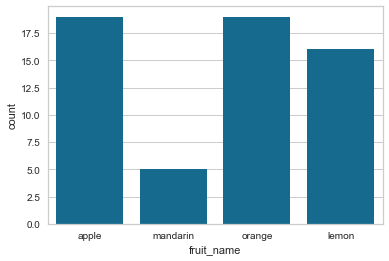

In [21]:
fruits.groupby('fruit_name').size()
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(fruits['fruit_name'], color='b', label='Count')
plt.show()

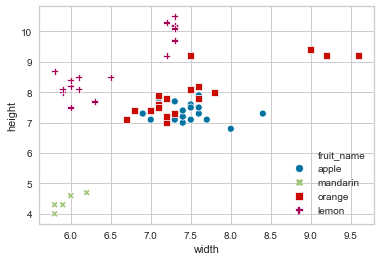

In [22]:
# Scatter plot 
import seaborn as sns
sns.scatterplot(x="width", y="height",hue="fruit_name", style="fruit_name", data=fruits)
plt.show()

In [23]:
# Descriptive Statistics 
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


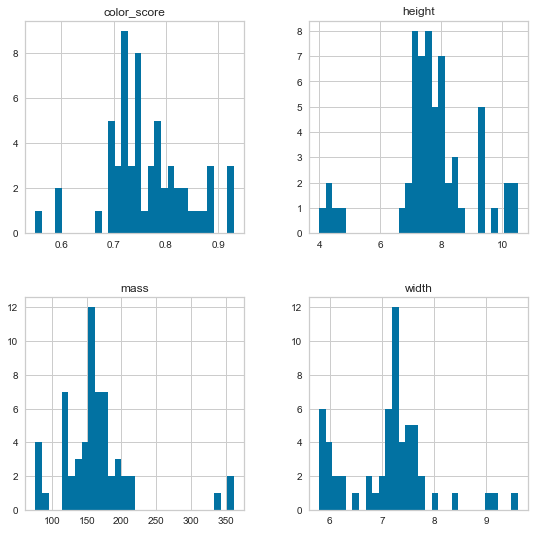

In [24]:
#histogram for each numeric imput variable
from scipy.stats import norm
fruits.drop('fruit_label', axis=1).hist(bins=30, figsize=(9,9))
plt.show()

Some numerical values do not have the same scale, so we need to scale them. We will split the dataset into training and test sets first. Then we scale the training data and then apply scaling to the test set, because in practice you are not provided with test data and you just have to evaluate your model on test data.

Here we use MinMaxScaler, which rescales the data set such that all feature values are in the range [0, 1]. 

The transformation formula is given by:

$ z_i = \frac{x_i - min(x_i)}{max(x_i) - min(x_i)}$




In [25]:
#Create a feature list and y
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']
#split the dataset into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#Use minmax
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Fit a logistic regression model
Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the logistic sigmoid function to return a probability value which can then be mapped to two or more discrete classes.

Reference: https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html

**Confusion matrix:** a table to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.

**Accuracy:** the ratio of number of correct predictions to the total number of input samples. 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


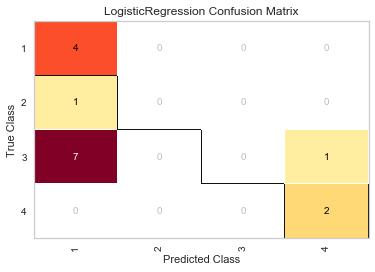

Accuracy of Logistic regression classifier on training set: 0.70
Accuracy of Logistic regression classifier on test set: 0.40


In [26]:
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
logreg = LogisticRegression()
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(logreg)
# Fit the passed model. 
cm.fit(X_train, y_train)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
# print out the confusion matrix
cm.show()
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

## Decision Tree 
A decision tree is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.
Reference:https://medium.com/greyatom/decision-trees-a-simple-way-to-visualize-a-decision-dc506a403aeb

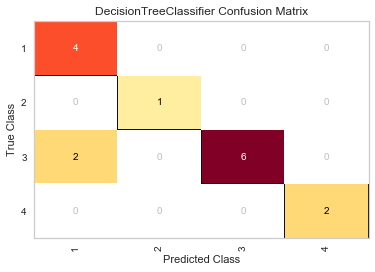

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.87


In [27]:
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier()
cm = ConfusionMatrix(dct)

# Fit the passed model. 
cm.fit(X_train, y_train)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dct.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dct.score(X_test, y_test)))

## K-Nearest Neighbors
The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.
Reference:https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

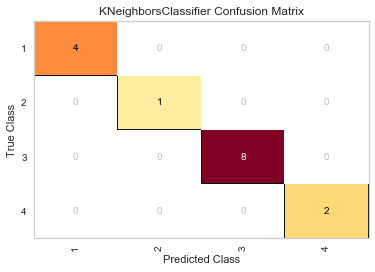

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00


In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
cm = ConfusionMatrix(knn)

# Fit the passed model. 
cm.fit(X_train, y_train)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))


## Linear Discriminant Analysis

Linear Discriminant Analysis is a dimensionality reduction technique used as a preprocessing step in Machine Learning and pattern classification applications.
The main goal of dimensionality reduction techniques is to reduce the dimensions by removing the redundant and dependent features by transforming the features from higher dimensional space to a space with lower dimensions.
Reference:https://medium.com/@srishtisawla/linear-discriminant-analysis-d38decf48105

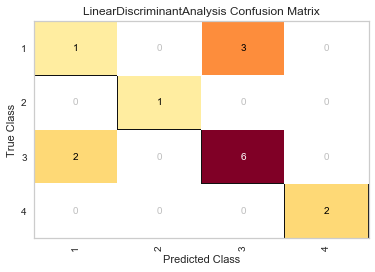

Accuracy of LDA classifier on training set: 0.86
Accuracy of LDA classifier on test set: 0.67


In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

cm = ConfusionMatrix(lda)

# Fit the passed model. 
cm.fit(X_train, y_train)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

## Gaussian Naive Bayes
It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

**Pros:** It is easy and fast to predict class of test data set. It also perform well in multi class prediction
When assumption of independence holds, a Naive Bayes classifier performs better compare to other models like logistic regression and you need less training data.
It perform well in case of categorical input variables compared to numerical variable(s). For numerical variable, normal distribution is assumed (bell curve, which is a strong assumption).

**Cons:** If categorical variable has a category (in test data set), which was not observed in training data set, then model will assign a 0 (zero) probability and will be unable to make a prediction. This is often known as “Zero Frequency”. To solve this, we can use the smoothing technique. One of the simplest smoothing techniques is called Laplace estimation.
On the other side naive Bayes is also known as a bad estimator, so the probability outputs from predict_proba are not to be taken too seriously.
Another limitation of Naive Bayes is the assumption of independent predictors. In real life, it is almost impossible that we get a set of predictors which are completely independent.

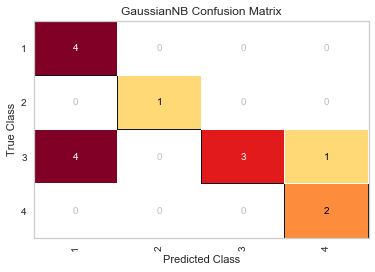

Accuracy of GNB classifier on training set: 0.86
Accuracy of GNB classifier on test set: 0.67


In [30]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
cm = ConfusionMatrix(gnb)

# Fit the passed model. 
cm.fit(X_train, y_train)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

## Random Forest

Keywords: bootstrap aggregation or bagging
          ensemble model, voting

**RF Algorithm:**
Fits a bunch of trees on "random samples
from our sample" (called bootstrap samples)
& they all vote on best class. The votes 
aggregated to choose the winning class.
The concept of combining predictions 
like this is called "bagging" or 
Bootstrap Aggregation.

Details:

1. Randomly select (with replacement) both
   N observations and a subset of predictors
   to create 100-500 subsets of data.

2. Fit a "bushy" tree to each sample
   e.g. no pruning so each WILL overfit!

3. At each split, variables are randomly sampled

4. Have each model make a prediction, then 
   count (when classifying) or average 
   (when regressing) their predictions
   (weights may be used based on model accuracy)
   
  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


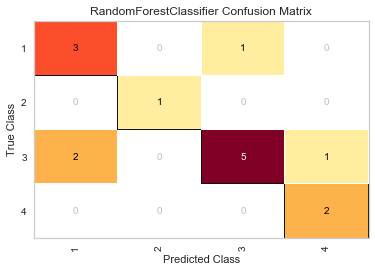

Accuracy of RFC classifier on training set: 1.00
Accuracy of RFC classifier on test set: 0.73


In [31]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
cm = ConfusionMatrix(rfc)

# Fit the passed model. 
cm.fit(X_train, y_train)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()
print('Accuracy of RFC classifier on training set: {:.2f}'
     .format(rfc.score(X_train, y_train)))
print('Accuracy of RFC classifier on test set: {:.2f}'
     .format(rfc.score(X_test, y_test)))

## Neural Networks (NN)

**Neural Network Algorithm**

* Simulates human brain by weighting
  "neurons" stored in "hidden layers"
  
* Each training observation adjusts
  the impact of each neuron, often
  through "back-propogation"

* Deep Learning uses many layers
  and many neurons per layer
  

**Pros:**  1) Excellent results for extreme 
  complexity e.g. voice, 
  image recognition 2) Though the model consists of a set
  of equations that is fairly small
  compared to many other methods 3) Model is quick to apply to new data

    
**Cons:** 1) Computationally intensive
  to train the model 2) Performance on numerical data
  rarely much better than faster
  methods e.g. rf, gbm 3) Models are impossible to interpret 4) Extremely sensitive to multicollinearity
  (use PCA first or method = "pcaNNet")


**Neural Network Tuning Parameters**

* Depends on specific type but
  in general:
  
* Number of hidden layers.

* Number of neurons per layer

* Type of feedback mechanism
  e.g. back-propogation
  
  Reference:  https://www.heatonresearch.com/2017/06/01/hidden-layers.html

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


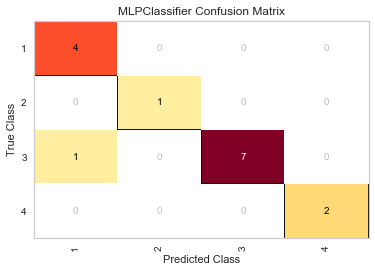

Accuracy of MLP classifier on training set: 0.89
Accuracy of MLP classifier on test set: 0.93


In [32]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(20,20,20), max_iter=500)  # max_iter: Maximum number of iterations, default is 200.
# hidden_layer_sizes (20, 20, 20): is a three-layer hidden layer NN with 20 neurons in the ith hidden layer.
cm = ConfusionMatrix(mlp)

# Fit fits the passed model. 
cm.fit(X_train, y_train)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()
print('Accuracy of MLP classifier on training set: {:.2f}'
     .format(mlp.score(X_train, y_train)))
print('Accuracy of MLP classifier on test set: {:.2f}'
     .format(mlp.score(X_test, y_test)))

## Model Evaluation
Common metrics for evaluating classifiers:

![image.png](confusion.png)


**Precision** is the number of correct positive results divided by the number of all predicted positive results .

**Recall** is the number of correct positive results divided by the number of actual positive results that should have been returned.

The **F1** score is a measure of a test’s accuracy. It considers both the precision and the recall of the test to compute the score. The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst at 0.
```python
precision = true positives / (true positives + false positives)

recall = true positives / (false negatives + true positives)

F1 score = 2 * (true positives) / (2 * true positives + false positives + false negatives)
```

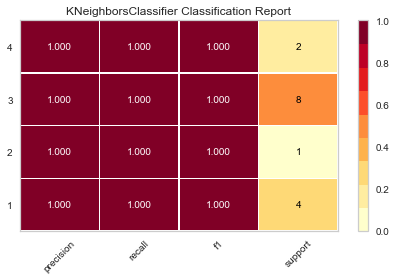

In [33]:
from yellowbrick.classifier import ClassificationReport

# Instantiate the classification model and visualizer
visualizer = ClassificationReport(knn, support=True)

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

## Predicted vs Actual in Test Data

In [34]:
y_new=knn.predict(X_test)
test = list(zip(y_new, y_test))
print(test)

[(3, 3), (3, 3), (4, 4), (3, 3), (1, 1), (1, 1), (3, 3), (4, 4), (3, 3), (1, 1), (2, 2), (1, 1), (3, 3), (3, 3), (3, 3)]


## Exercise2: 

The dataset we will be working with in this tutorial is the Breast Cancer Wisconsin Diagnostic Database. The dataset includes various information about breast cancer tumors, as well as classification labels of malignant or benign. The dataset has 569 instances, or data, on 569 tumors and includes information on 30 attributes, or features, such as the radius of the tumor, texture, smoothness, and area.

Using this dataset, we will build a machine learning model to use tumor information to predict whether or not a tumor is malignant or benign.

The syntax below imported and loaded the dataset, splitted the data into training and test and also applied Gaussian Naive Bayes model to the data.
You need to fit the Logistic Regression and Random Forest model and find the best one. 

```python
from sklearn.datasets import load_breast_cancer
# Load dataset
data = load_breast_cancer()
# Organize our data
y_names = data['target_names']
y = data['target']
feature_names = data['feature_names']
X = data['data']
# Split our data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)
#fit Gaussian Naive model
gnb = GaussianNB()
cm = ConfusionMatrix(gnb, classes=y_names, label_encoder={0:'malignant', 1: 'benign'}  )
# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)
# How did we do?
cm.show()
print('Accuracy of RFC classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of RFC classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))
     

```


In [35]:
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
# check the data
data['data'][0:1]


array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01]])

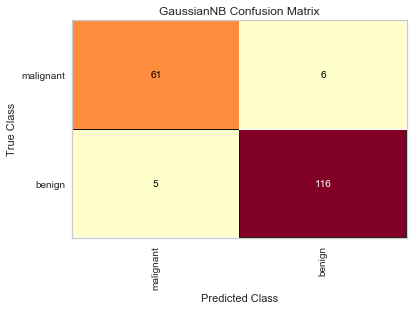

Accuracy of GNB classifier on training set: 0.94
Accuracy of GNB classifier on test set: 0.94


In [36]:
# Organize our data
y_names = data['target_names']
y = data['target']
feature_names = data['feature_names']
X = data['data']


# Split our data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

#fit Gaussian Naive model
gnb = GaussianNB()
cm = ConfusionMatrix(gnb, classes=y_names, label_encoder={0:'malignant', 1: 'benign'}  )
# Fit fits the passed model. 
cm.fit(X_train, y_train)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))


In [37]:
# logistic regression

## Unsupervised Learning

When dealing with real-world problems, most of the time, data will not come with predefined labels, so we will want to develop machine learning models that can correctly classified the data by finding some commomality in the features to predict the classes on new data.

Two main types of problems in unsupervised learning:

* Clustering
* Dimension Reduction

This workshop we will cover the clustering problems. 

## Clustering Analysis

Cluster analysis or clustering is to group a set of objects that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).
![image.png](Unsupervise3.png)

Clustering, however, has many different names (with respect to the fields it is being applied):

* Cluster analysis
* Automatic classification
* Data segmentation

**All the above names essentially mean clustering.**

Cluster analysis have an incredible wide range of applications and are quite useful to solve real world problems such as anomaly detection, recommending systems, documents grouping, or finding customers with common interests based on their purchases.
Some of the most common clustering algorithms will be explored in the workshop, are:
* K-Means
* Hierarchical Clustering
* Density Based Scan Clustering (DBSCAN)
* Gaussian Clustering Model

## Choosing a Problem

We will take an example of market segmentation. The data set contains 30 samples and two features, satisfaction and loyalty. We will try to analyse the type of customers in the market based on the features.

In [38]:
# import packages
import pandas as pd
# import data
data=pd.read_csv(r"I:\Classes\OIT_Training\Python for Machine Learning\kmeans clustering.csv")
data.head()


,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


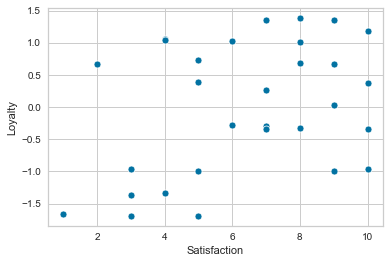

In [39]:
# scatter plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x="Satisfaction", y="Loyalty",  data=data)
plt.show()


## K-means Cluster

k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster (Definition from Wiki).

### How the K-means algorithm works
To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids
It halts creating and optimizing clusters when either:
The centroids have stabilized — there is no change in their values because the clustering has been successful.
The defined number of iterations has been achieved.

reference: https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1

In [40]:
from sklearn.cluster import KMeans

# copy the data and ignore the feature names and store the data into a variable X.
x = data.copy()

# create a variable kmeans using kmeans function and passing the argument 2 in the Kmeans
kmeans = KMeans(2) # split the customers into two clusters
kmeans.fit(x)

# Clustering result
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)

Plot the clusters

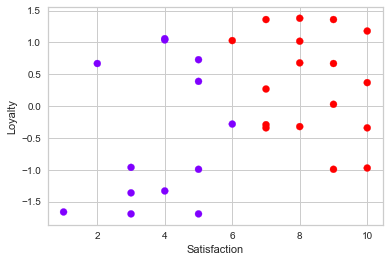

In [41]:
plt.scatter(clusters['Satisfaction'], clusters['Loyalty'],c=clusters['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()
# colormap reference: https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html

## The Problem
The biggest problem here is that Satisfaction is chosen as a feature and loyalty has been ignored. 
Satisfaction was chosen as the feature because it had large values.
So the problem is because both variables are not scaled. First we have to standardize the data to make both two variables have equal weights in our clustering. We will scale the data around zero mean. 

In [42]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

## The Elbow Method:
Here the elbow method can help us figure out how many clusters we need. What elbow method does is it starts of with making one cluster to the number of clusters in our sample and with the kmeans inertia value. Based on the values, we determine what the appropriate number of clusters is.

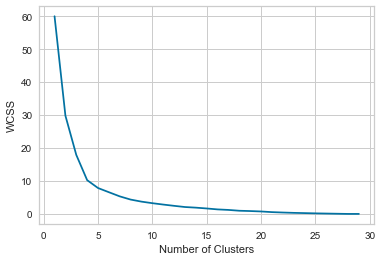

In [43]:
wcss = []
for i in range (1, 30):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
# visualized the Elbow method
plt.plot(range(1,30), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


Here the elbow point comes at around 4, so the optimal number of cluster is 4. 


In [44]:
kmeans_new = KMeans(4)
kmeans.fit(x_scaled)
cluster_new = x.copy()
cluster_new['cluster_pred']=kmeans_new.fit_predict(x_scaled)
#cluster_new

Plot the newly cluster:

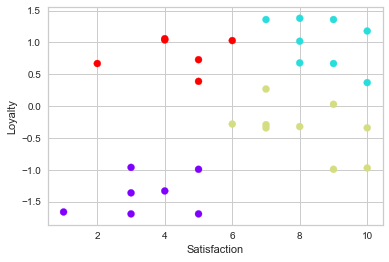

In [45]:
plt.scatter(clusters['Satisfaction'], clusters['Loyalty'],c=cluster_new['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

## Hierarchical clustering

### How Hierarchical Clustering Works
Hierarchical clustering starts by treating each observation as a separate cluster. Then, it repeatedly executes the following two steps: (1) identify the two clusters that are closest together, and (2) merge the two most similar clusters. This continues until all the clusters are merged together. This is illustrated in the diagrams below.

### Dendrogram
A dendrogram is a diagram that shows the hierarchical relationship between objects. It is most commonly created as an output from hierarchical clustering. The main use of a dendrogram is to work out the best way to allocate objects to clusters.

The key to interpreting a dendrogram is to focus on the height at which any two objects are joined together. In the example below, we can see that 4 and 22 are most similar, as the height of the link that joins them together is the smallest.

Observations are allocated to clusters by drawing a horizontal line through the dendrogram. Observations that are joined together below the line are in clusters.

Reference: https://www.displayr.com/what-is-dendrogram/

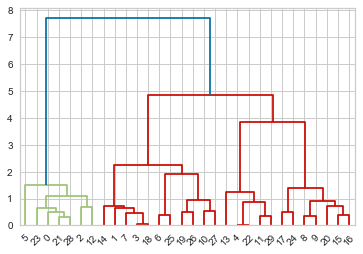

In [46]:
# plot dendrogram 
from scipy.cluster import hierarchy
Z = hierarchy.linkage(x_scaled,'ward')
dn = hierarchy.dendrogram(Z)
plt.show()


In [47]:
# import hierarchical clustering
from sklearn.cluster import AgglomerativeClustering

# Create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')

# save clusters for chart
cluster_new['cluster_hc'] = hc.fit_predict(x_scaled)
#cluster_new

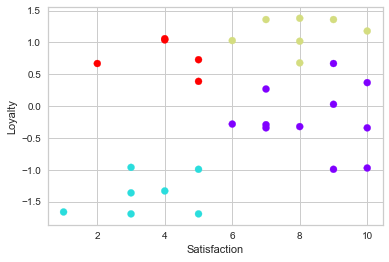

In [48]:
# plot the cluster
plt.close()
plt.scatter(cluster_new['Satisfaction'], cluster_new['Loyalty'],c=cluster_new['cluster_hc'], cmap = 'rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

## Density Based Scan Clustering (DBSCAN)

The key idea is that for each point of a cluster, the neighborhood of a given radius has to contain at least a minimum number of points. Compared to centroid-based clustering like K-Means, density-based clustering works by identifying “dense” clusters of points, allowing it to learn clusters of arbitrary shape and identify outliers in the data. 

**DBSCAN algorithm requires two parameters:**

**eps** : It defines the neighborhood around a data point i.e. if the distance between two points is lower or equal to ‘eps’ then they are considered as neighbors. If the eps value is chosen too small then large part of the data will be considered as outliers. If it is chosen very large then the clusters will merge and majority of the data points will be in the same clusters. One way to find the eps value is based on the k-distance graph.

**MinPts**: Minimum number of neighbors (data points) within eps radius. Larger the dataset, the larger value of MinPts must be chosen. As a general rule, the minimum MinPts can be derived from the number of dimensions D in the dataset as, MinPts >= D+1. The minimum value of MinPts must be chosen at least 3.
In this algorithm, we have 3 types of data points.

**Core Point**: A point is a core point if it has more than MinPts points within eps.
**Border Point**: A point which has fewer than MinPts within eps but it is in the neighborhood of a core point.
**Noise or outlier**: A point which is not a core point or border point.

Reference: https://www.geeksforgeeks.org/dbscan-clustering-in-ml-density-based-clustering/

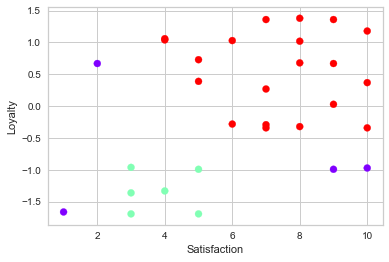

In [49]:
from sklearn.cluster import DBSCAN 
db_default = DBSCAN(eps = 0.6, min_samples = 3)

# save clusters for chart
cluster_new['cluster_db'] =db_default.fit_predict(x_scaled)
#print(cluster_db)

# plot the cluster
plt.close()
plt.scatter(cluster_new['Satisfaction'], cluster_new['Loyalty'],c=cluster_new['cluster_db'], cmap = 'rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()


## Gaussian Mixture Model

A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters.

The GaussianMixture object implements the expectation-maximization (EM) algorithm for fitting mixture-of-Gaussian models. It can also draw confidence ellipsoids for multivariate models, and compute the Bayesian Information Criterion to assess the number of clusters in the data.

Reference: https://scikit-learn.org/stable/modules/mixture.html

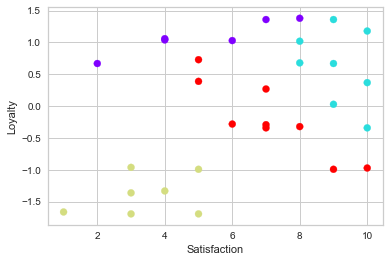

In [50]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4) # four clusters.

# save cluster into a column
cluster_new['cluster_gmm'] = gmm.fit_predict(x_scaled)

# plot the cluter
plt.close()
plt.scatter(cluster_new['Satisfaction'], cluster_new['Loyalty'],c = cluster_new['cluster_gmm'], cmap = 'rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

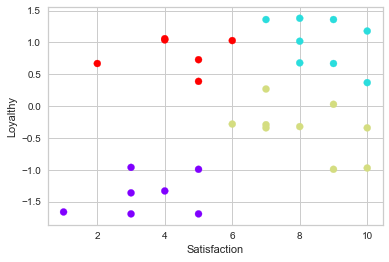

In [51]:
# plot the Kmean cluster again.
plt.scatter(clusters['Satisfaction'], clusters['Loyalty'],c=cluster_new['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalthy')
plt.show()

## Analysis (The final step):
Through the given figure following things can be interpreted:

The yellow are the people who are less satisfied and less loyal and therefore can be termed as alienated.
The purple dots are people with high loyalty and less satisfaction.
The blue dots are the people with high loyalty and high satisfaction and they are the fans.
The red dots are the people who are in the midst of things.
The ultimate goal of any businessman would be to have as many people up there in the fans category. We are ready with a solution and we can target the audience as per our analysis. For example, the crowd who are supporters can easily be turned into fans by fulfilling their satisfaction level.

reference:
1. https://medium.com/code-to-express/k-means-clustering-for-beginners-using-python-from-scratch-f20e79c8ad00
2. https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py
3. https://hdbscan.readthedocs.io/en/latest/comparing_clustering_algorithms.html#spectral-clustering

## Another example
The python commands below generates 1000 random dataset of X and Y and the scatter plot of X can make two moons shape. We are going to use different linkage methods for hierarchical clustering on datasets that are “interesting”. 

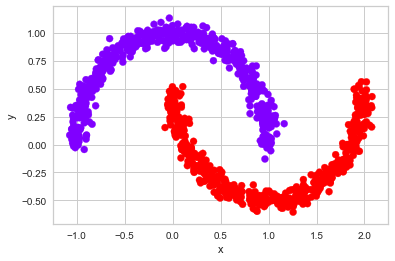

In [52]:
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
import numpy as np
np.random.seed(0)
# generate 2d classification dataset
X,y= make_moons(n_samples=1000, noise=0.05)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}

# Scatter plot of the moon data.
plt.scatter(df['x'], df['y'], c=y, cmap = 'rainbow')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [53]:
#heirotical ward method
x = df[['x','y']]

# Create clusters
hc = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'ward')

# save clusters for chart
cluster_moon = df.copy()

# create a variable named cluster_ward  in cluster_moon data.
cluster_moon['cluster_ward'] = hc.fit_predict(x)

# print out the data.
cluster_moon.head(n=10)

,x,y,label,cluster_ward
0,2.021001,0.490179,1,1
1,1.678201,-0.201987,1,1
2,-0.282245,0.858785,0,0
3,-0.021440,0.176281,1,0
4,0.504842,-0.391043,1,1
5,1.969539,0.360055,1,1
6,0.956596,0.253665,0,0
7,0.094879,0.983378,0,0
8,-0.441660,0.872034,0,0
9,0.707516,-0.512674,1,1


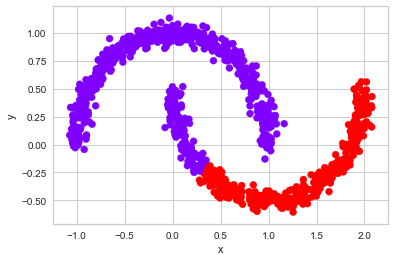

In [54]:
# plot the output
plt.scatter(cluster_moon['x'], cluster_moon['y'],c=cluster_moon['cluster_ward'], cmap = 'rainbow')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Exercise 3
Used the data above and try the single and complete linkage clustering method and plot the data.

```python
#heirotical single method
# Create clusters
hc = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'single')
#heirotical complete method

# Create clusters
hc = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'complete')
```

## Answer

Exercise 1
1. Import the packages using the python code below:
```Python
#import the packages
import pandas as pd
#import model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from yellowbrick.features import Rank2D
from yellowbrick.regressor import ResidualsPlot
```
2. Import the data named "'bikeshare.csv" as a dataframe.
```python
data =  pd.read_csv(r"C:\Users\XZHU8\Documents\OIT related\Workshop\Python for Machine Learning\bikeshare.csv")
```
3. Create a Python list of feature names:
    X is "season", "month", "hour", "holiday", "weekday", "workingday",
    "weather", "temp", "feelslike", "humidity", "windspeed".
    
4. Use the list to select a subset, X, of the original DataFrame 

5. Use the python syntax below to show the pearson correlaion matrix

6. Use the list to select a subset, y, of the original DataFrame: 
    Y is "riders"

7. Split X and y into training and testing sets 

8. Create a linear regression function and fit the model from the training data, and test using the testing data.

9. Check the coeffiecient.

10. Visulize the residuals of training and testing model 

```python
# Create a Python list of feature names
FeatureNames = ["season", "month", "hour", "holiday", "weekday", "workingday",
    "weather", "temp", "feelslike", "humidity", "windspeed"]
    ```
```python
# Select a subset, X, of the original DataFrame 
X = data[FeatureNames]
```

```python
# visualization
visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(X)
visualizer.poof()
```
```Python
Y = data["riders"]
```
```Python
#Split X and y into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
```
```Python
# Linear Regression Model
linreg = LinearRegression()
# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# Check the coeffiecient
linreg.coef_
```


```python
#Visulize the residuals of training and testing model
visualizer = ResidualsPlot(linreg)
visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data
```
Exercise 2

```python
from sklearn.datasets import load_breast_cancer
# Load dataset
data = load_breast_cancer()
# Organize our data
y_names = data['target_names']
y = data['target']
feature_names = data['feature_names']
X = data['data']
# Split our data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)
#fit Gaussian Naive model
gnb = GaussianNB()
cm = ConfusionMatrix(gnb, classes=y_names, label_encoder={0:'malignant', 1: 'benign'}  )
# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)
# How did we do?
cm.poof()
```

Exercise 3
```python
#heirotical single method
# Create clusters
hc = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'single')
# save clusters for chart
cluster_moon['cluster_single'] = hc.fit_predict(x)
cluster_moon.head(n=10)
# plot the output
plt.scatter(cluster_moon['x'], cluster_moon['y'],c=cluster_moon['cluster_single'], cmap = 'rainbow')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
```

In [55]:
data =  pd.read_csv(r"C:\Users\XZHU8\Documents\OIT related\Workshop\Python for Machine Learning\bikeshare.csv")

FileNotFoundError: File b'C:\\Users\\XZHU8\\Documents\\OIT related\\Workshop\\Python for Machine Learning\\bikeshare.csv' does not exist

In [60]:
FeatureNames = ["season", "month", "hour", "holiday", "weekday", "workingday",
    "weather", "temp", "feelslike", "humidity", "windspeed"]
X=data[FeatureNames]
visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(X)
visualizer.poof()
y = data["riders"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


KeyError: "['season' 'month' 'hour' 'holiday' 'weekday' 'workingday' 'weather' 'temp'\n 'feelslike' 'humidity' 'windspeed'] not in index"

In [57]:
#import the packages
import pandas as pd
#import model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from yellowbrick.features import Rank2D
from yellowbrick.regressor import ResidualsPlot

In [58]:
# Linear Regression Model
linreg = LinearRegression()
# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

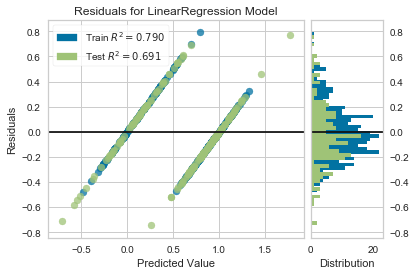

In [59]:
from yellowbrick.regressor import ResidualsPlot
# Visualzie the training and fitting model and the residual histogram
visualizer = ResidualsPlot(linreg)
visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data